In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e11/sample_submission.csv
/kaggle/input/playground-series-s4e11/train.csv
/kaggle/input/playground-series-s4e11/test.csv


In [2]:
import matplotlib.pyplot as plt
import random
random.seed(123)
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold, RandomizedSearchCV, KFold


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
train_df = pd.read_csv('/kaggle/input/playground-series-s4e11/train.csv')
test_df = pd.read_csv('/kaggle/input/playground-series-s4e11/test.csv')
test_df_copy = pd.read_csv('/kaggle/input/playground-series-s4e11/test.csv')


In [5]:
def typeDF(df):
    print(df.shape)
    print(df.dtypes)

In [6]:
typeDF(train_df)

(140700, 20)
id                                         int64
Name                                      object
Gender                                    object
Age                                      float64
City                                      object
Working Professional or Student           object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
Depression                                 int64
dtype: 

In [7]:
typeDF(test_df)

(93800, 19)
id                                         int64
Name                                      object
Gender                                    object
Age                                      float64
City                                      object
Working Professional or Student           object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness          object
dtype: object


In [8]:
train_df.head(3)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1


In [9]:
test_df.head(3)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
2,140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No


In [10]:
train_df.columns

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [11]:
print(train_df.info())
print(train_df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [12]:
print(test_df.info())
print(test_df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     93800 non-null  int64  
 1   Name                                   93800 non-null  object 
 2   Gender                                 93800 non-null  object 
 3   Age                                    93800 non-null  float64
 4   City                                   93800 non-null  object 
 5   Working Professional or Student        93800 non-null  object 
 6   Profession                             69168 non-null  object 
 7   Academic Pressure                      18767 non-null  float64
 8   Work Pressure                          75022 non-null  float64
 9   CGPA                                   18766 non-null  float64
 10  Study Satisfaction                     18767 non-null  float64
 11  Jo

##### Since the number of missing values for 'Academic Pressure', 'CGPA', 'Study Satisfaction' columns more than %50, I dropped these columns

In [13]:
train_df = train_df.drop(['Academic Pressure', 'CGPA', 'Study Satisfaction'], axis=1)
test_df = test_df.drop(['Academic Pressure', 'CGPA', 'Study Satisfaction'], axis=1)

In [14]:
def checkColUnique(df):
    for col in df.columns:
        if col=='id' or col=='Name' or col=='Age' or col=='City':
            pass
        else:
            print(str(col))
            print(df[col].unique())
            print(len(df[col].unique()))
            print('*************')
        
checkColUnique(train_df)

Gender
['Female' 'Male']
2
*************
Working Professional or Student
['Working Professional' 'Student']
2
*************
Profession
['Chef' 'Teacher' nan 'Business Analyst' 'Finanancial Analyst' 'Chemist'
 'Electrician' 'Software Engineer' 'Data Scientist' 'Plumber'
 'Marketing Manager' 'Accountant' 'Entrepreneur' 'HR Manager'
 'UX/UI Designer' 'Content Writer' 'Educational Consultant'
 'Civil Engineer' 'Manager' 'Pharmacist' 'Financial Analyst' 'Architect'
 'Mechanical Engineer' 'Customer Support' 'Consultant' 'Judge'
 'Researcher' 'Pilot' 'Graphic Designer' 'Travel Consultant'
 'Digital Marketer' 'Lawyer' 'Research Analyst' 'Sales Executive' 'Doctor'
 'Unemployed' 'Investment Banker' 'Family Consultant' 'B.Com' 'BE'
 'Student' 'Yogesh' 'Dev' 'MBA' 'LLM' 'BCA' 'Academic' 'Profession'
 'FamilyVirar' 'City Manager' 'BBA' 'Medical Doctor'
 'Working Professional' 'MBBS' 'Patna' 'Unveil' 'B.Ed' 'Nagpur' 'Moderate'
 'M.Ed' 'Analyst' 'Pranav' 'Visakhapatnam' 'PhD' 'Yuvraj']
65
***********

In [15]:
checkColUnique(test_df)

Gender
['Male' 'Female']
2
*************
Working Professional or Student
['Working Professional' 'Student']
2
*************
Profession
['Judge' 'Educational Consultant' 'Teacher' nan 'Customer Support'
 'Chemist' 'Content Writer' 'Consultant' 'HR Manager' 'Research Analyst'
 'Digital Marketer' 'Electrician' 'Marketing Manager' 'Plumber'
 'Pharmacist' 'Lawyer' 'Pilot' 'Architect' 'Chef' 'Graphic Designer'
 'Entrepreneur' 'Manager' 'Mechanical Engineer' 'Software Engineer'
 'Travel Consultant' 'Finanancial Analyst' 'Financial Analyst' 'Doctor'
 'Business Analyst' 'UX/UI Designer' 'Sales Executive' 'Data Scientist'
 'Accountant' 'Researcher' 'Civil Engineer' 'Investment Banker'
 'Unhealthy' 'B.Ed' 'Student' 'Working Professional' '3M' 'ME' 'B.Pharm'
 '24th' 'Manvi' 'Yogesh' 'Samar' 'Surat' 'PhD' 'M.Ed' 'MD' 'Name' 'MCA'
 'Simran' 'Analyst' 'Profession' 'Unemployed' 'BBA' 'M.Tech' 'LLM'
 'Surgeon' 'No' 'Unveil' 'City Consultant' 'M.Pharm']
65
*************
Work Pressure
[ 2.  4. nan  5.  1

In [16]:
train_df = train_df.drop(['id', 'Name', 'City'], axis=1)
test_df = test_df.drop(['id', 'Name', 'City'], axis=1)

In [17]:
train_df.columns

Index(['Gender', 'Age', 'Working Professional or Student', 'Profession',
       'Work Pressure', 'Job Satisfaction', 'Sleep Duration', 'Dietary Habits',
       'Degree', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

### Preprocessing on columns

#### Age column

In [18]:
print(train_df['Age'].dtypes)
print(test_df['Age'].dtypes)

float64
float64


In [19]:
train_df['Age'] = train_df['Age'].astype(int)
test_df['Age'] = test_df['Age'].astype(int)

#### Gender column

In [20]:
print(train_df['Gender'].unique())
print(test_df['Gender'].unique())

['Female' 'Male']
['Male' 'Female']


In [21]:
train_df['Gender'] = train_df['Gender'].map({"Male":1,"Female":2})
test_df['Gender'] = test_df['Gender'].map({"Male":1,"Female":2})

#### Working Professional or Student column

In [22]:
print(train_df['Working Professional or Student'].unique())
print(test_df['Working Professional or Student'].unique())

['Working Professional' 'Student']
['Working Professional' 'Student']


In [23]:
train_df['Working Professional or Student'] = train_df['Working Professional or Student'].map({"Working Professional":1,"Student":2})
test_df['Working Professional or Student'] = test_df['Working Professional or Student'].map({"Working Professional":1,"Student":2})

#### Have you ever had suicidal thoughts column

In [24]:
print(train_df['Have you ever had suicidal thoughts ?'].unique())
print(test_df['Have you ever had suicidal thoughts ?'].unique()) 

['No' 'Yes']
['No' 'Yes']


In [25]:
train_df['Have you ever had suicidal thoughts ?'] = train_df['Have you ever had suicidal thoughts ?'].map({"Yes":1,"No":0})
test_df['Have you ever had suicidal thoughts ?'] = test_df['Have you ever had suicidal thoughts ?'].map({"Yes":1,"No":0})

#### Family History of Mental Illness column

In [26]:
print(train_df['Family History of Mental Illness'].unique())
print(test_df['Family History of Mental Illness'].unique())

['No' 'Yes']
['Yes' 'No']


In [27]:
train_df['Family History of Mental Illness'] = train_df['Family History of Mental Illness'].map({"Yes":1,"No":0})
test_df['Family History of Mental Illness'] = test_df['Family History of Mental Illness'].map({"Yes":1,"No":0})

#### Sleep Duration column

In [28]:
print(train_df['Sleep Duration'].unique())
print(len(train_df['Sleep Duration'].unique()))

['More than 8 hours' 'Less than 5 hours' '5-6 hours' '7-8 hours'
 'Sleep_Duration' '1-2 hours' '6-8 hours' '4-6 hours' '6-7 hours'
 '10-11 hours' '8-9 hours' '40-45 hours' '9-11 hours' '2-3 hours'
 '3-4 hours' 'Moderate' '55-66 hours' '4-5 hours' '9-6 hours' '1-3 hours'
 'Indore' '45' '1-6 hours' '35-36 hours' '8 hours' 'No' '10-6 hours'
 'than 5 hours' '49 hours' 'Unhealthy' 'Work_Study_Hours' '3-6 hours'
 '45-48 hours' '9-5' 'Pune' '9-5 hours']
36


In [29]:
print(test_df['Sleep Duration'].unique())
print(len(test_df['Sleep Duration'].unique()))

['Less than 5 hours' '7-8 hours' 'More than 8 hours' '5-6 hours' '0'
 'Meerut' '9-5 hours' '6-7 hours' '60-65 hours' 'Vivan' '3-4 hours'
 '1-6 hours' '9-5' 'Unhealthy' '8-9 hours' '4-5 hours' 'than 5 hours'
 '9-6 hours' '1-2 hours' '8-89 hours'
 'Have_you_ever_had_suicidal_thoughts' '20-21 hours' '10-6 hours'
 '1-3 hours' '6 hours' '50-75 hours' '4-6 hours' '2-3 hours' '9-11 hours'
 '9-10 hours' '3-6 hours']
31


In [30]:
set1 = set(train_df['Sleep Duration'])
set2 = set(test_df['Sleep Duration'])

similar = set1 & set2

unique_to_df1 = set1 - set2
unique_to_df2 = set2 - set1

all_unique = set1 | set2

#print("Similar values:", similar)
#print("Unique to df1:", unique_to_df1)
#print("Unique to df2:", unique_to_df2)
print("All unique values:", all_unique)
print(len(all_unique))

All unique values: {'6-8 hours', '6-7 hours', '35-36 hours', '9-5', '55-66 hours', 'Indore', '4-5 hours', '4-6 hours', '49 hours', '10-11 hours', 'Moderate', '8-89 hours', '7-8 hours', '8-9 hours', '3-6 hours', '0', '9-11 hours', 'Sleep_Duration', '2-3 hours', '10-6 hours', '45-48 hours', '9-6 hours', '9-10 hours', '5-6 hours', '1-2 hours', '9-5 hours', 'Unhealthy', 'Have_you_ever_had_suicidal_thoughts', 'Less than 5 hours', '1-6 hours', 'Meerut', '40-45 hours', 'Work_Study_Hours', '6 hours', '45', 'Vivan', '3-4 hours', 'No', '50-75 hours', '8 hours', 'than 5 hours', '1-3 hours', 'Pune', '60-65 hours', '20-21 hours', 'More than 8 hours'}
46


In [31]:
sleep_hours_map = {'35-36 hours' : '5-6 hours', #Calculated 35/7
                   '50-75 hours' : 'More than 8 hours', #Calculated 50/7 - 75/7 
                   'Vivan' : 'Vivan',
                   '3-6 hours': 'Less than 5 hours', 
                   '1-2 hours' : 'Less than 5 hours',
                   'No': 'No',
                   '10-11 hours' : 'More than 8 hours',
                   'Moderate': 'Moderate',
                   '10-6 hours' : '7-8 hours', 
                   'Meerut' : 'Meerut',
                   '45-48 hours' : '5-6 hours',   #Calculated 45/7 -  48/7
                   '8-89 hours' : 'More than 8 hours', 
                   '9-5' : '7-8 hours',
                   'than 5 hours' : 'Less than 5 hours',
                   '1-6 hours' : 'Less than 5 hours',
                   '0': '0', 
                   'Pune': 'Pune',
                   '2-3 hours' : 'Less than 5 hours', 
                   'Unhealthy': 'Unhealthy',
                   'Have_you_ever_had_suicidal_thoughts': 'Have_you_ever_had_suicidal_thoughts',
                   '8-9 hours' : 'More than 8 hours', 
                   'More than 8 hours': 'More than 8 hours',
                   '7-8 hours': '7-8 hours',
                   '20-21 hours' : 'Less than 5 hours',   #calculated 21/7
                   '6 hours' : '5-6 hours', 
                   '55-66 hours' : 'More than 8 hours',   #calculated 55/7 - 66/7
                   '9-10 hours' : 'More than 8 hours', 
                   '9-5 hours' :'7-8 hours', 
                   '6-8 hours' :'7-8 hours', 
                   '9-6 hours' :'7-8 hours', 
                   '8 hours' :'7-8 hours', 
                   '4-5 hours' : 'Less than 5 hours', 
                   'Sleep_Duration' : 'Sleep_Duration', 
                   'Less than 5 hours': 'Less than 5 hours',
                   '49 hours' : '7-8 hours',    #calculated 49/7
                   '6-7 hours' : '5-6 hours', 
                   '3-4 hours' : 'Less than 5 hours', 
                   '5-6 hours': '5-6 hours',
                   '40-45 hours' : '5-6 hours', #calculated 40/7 - 45/7
                   '45': '5-6 hours',  
                   'Indore': 'Indore',
                   '60-65 hours': 'More than 8 hours', #calculated 60/7 - 65/7
                   'Work_Study_Hours': 'Work_Study_Hours',
                   '9-11 hours': 'More than 8 hours', 
                   '1-3 hours':'Less than 5 hours',
                   '4-6 hours':'Less than 5 hours'}

train_df['Sleep Duration'] = train_df['Sleep Duration'].map(sleep_hours_map)
test_df['Sleep Duration'] = test_df['Sleep Duration'].map(sleep_hours_map)

In [32]:
top_4_categories = train_df['Sleep Duration'].value_counts().nlargest(4).index
non_top_4_rows = ~train_df['Sleep Duration'].isin(top_4_categories)
train_df.loc[non_top_4_rows, 'Sleep Duration'] = np.random.choice(top_4_categories, size=non_top_4_rows.sum(), replace=True)

In [33]:
top_4_categories = test_df['Sleep Duration'].value_counts().nlargest(4).index
non_top_4_rows = ~test_df['Sleep Duration'].isin(top_4_categories)
test_df.loc[non_top_4_rows, 'Sleep Duration'] = np.random.choice(top_4_categories, size=non_top_4_rows.sum(), replace=True)

In [34]:
train_df['Sleep Duration'] = train_df['Sleep Duration'].map({"Less than 5 hours":1,"7-8 hours":2,"More than 8 hours":3,"5-6 hours":4})
test_df['Sleep Duration'] = test_df['Sleep Duration'].map({"Less than 5 hours":1,"7-8 hours":2,"More than 8 hours":3,"5-6 hours":4})

In [35]:
train_df['Sleep Duration'].value_counts()

Sleep Duration
1    38825
2    36980
3    32735
4    32160
Name: count, dtype: int64

####  Dietary Habits column

In [36]:
print(train_df['Dietary Habits'].unique())
print(test_df['Dietary Habits'].unique())

['Healthy' 'Unhealthy' 'Moderate' 'Yes' 'Pratham' 'BSc' 'Gender' '3'
 'More Healthy' 'Less than Healthy' 'Mihir' '1.0' 'Hormonal' 'Electrician'
 nan 'No Healthy' 'Less Healthy' 'M.Tech' 'Vegas' 'No' 'Male' 'Indoor'
 'Class 12' '2']
['Moderate' 'Healthy' 'Unhealthy' 'More Healthy' 'No' 'Indoor' 'Prachi'
 nan 'Male' 'Less Healthy' 'Mealy' 'Resistant' 'MCA' '5 Healthy'
 'Academic' 'Educational' 'Soham' '5 Unhealthy' 'Vivaan' 'Raghav' '1.0'
 'Naina' 'Kolkata']


In [37]:
print(train_df['Dietary Habits'].value_counts())
print(test_df['Dietary Habits'].value_counts())

Dietary Habits
Moderate             49705
Unhealthy            46227
Healthy              44741
Yes                      2
No                       2
More Healthy             2
No Healthy               1
Class 12                 1
Indoor                   1
Male                     1
Vegas                    1
M.Tech                   1
Less Healthy             1
1.0                      1
Electrician              1
Hormonal                 1
Mihir                    1
Less than Healthy        1
3                        1
Gender                   1
BSc                      1
Pratham                  1
2                        1
Name: count, dtype: int64
Dietary Habits
Moderate        33018
Unhealthy       30786
Healthy         29966
No                  6
More Healthy        2
Academic            1
Naina               1
1.0                 1
Raghav              1
Vivaan              1
5 Unhealthy         1
Soham               1
Educational         1
MCA                 1
5 Healthy      

In [38]:
top_3_categories = train_df['Dietary Habits'].value_counts().nlargest(3).index
non_top_3_rows = ~train_df['Dietary Habits'].isin(top_3_categories)
train_df.loc[non_top_3_rows, 'Dietary Habits'] = np.random.choice(top_3_categories, size=non_top_3_rows.sum(), replace=True)

In [39]:
top_3_categories = test_df['Dietary Habits'].value_counts().nlargest(3).index
non_top_3_rows = ~test_df['Dietary Habits'].isin(top_3_categories)
test_df.loc[non_top_3_rows, 'Dietary Habits'] = np.random.choice(top_3_categories, size=non_top_3_rows.sum(), replace=True)

In [40]:
train_df['Dietary Habits'] = train_df['Dietary Habits'].map({"Moderate":1,"Unhealthy":2,"Healthy":3})
test_df['Dietary Habits'] = test_df['Dietary Habits'].map({"Moderate":1,"Unhealthy":2,"Healthy":3})

#### Work/Study Hours column

In [41]:
print(train_df['Work/Study Hours'].unique())
print(test_df['Work/Study Hours'].unique())

[ 1.  7.  3. 10.  9.  6.  8.  2.  0.  5. 12.  4. 11.]
[ 9.  6. 12. 10.  3.  0.  8.  5.  4. 11.  7.  1.  2.]


In [42]:
train_df['Work/Study Hours'] = train_df['Work/Study Hours'].astype(int)
test_df['Work/Study Hours'] = test_df['Work/Study Hours'].astype(int)

#### Financial Stress column

In [43]:
print(train_df['Financial Stress'].unique())
print(test_df['Financial Stress'].unique())

[ 2.  3.  1.  4.  5. nan]
[3. 4. 2. 1. 5.]


In [44]:
train_df['Financial Stress'] = train_df['Financial Stress'].fillna(train_df['Financial Stress'].median())

In [45]:
train_df['Financial Stress'] = train_df['Financial Stress'].astype(int)
test_df['Financial Stress'] = test_df['Financial Stress'].astype(int)

In [46]:
train_df.columns

Index(['Gender', 'Age', 'Working Professional or Student', 'Profession',
       'Work Pressure', 'Job Satisfaction', 'Sleep Duration', 'Dietary Habits',
       'Degree', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

#### Work Pressure,Job Satisfaction & Profession columns

In [47]:
print(train_df['Work Pressure'].unique())
print(test_df['Work Pressure'].unique())

[ 5.  4. nan  1.  2.  3.]
[ 2.  4. nan  5.  1.  3.]


In [48]:
print(train_df['Job Satisfaction'].unique())
print(test_df['Job Satisfaction'].unique())

[ 2.  3. nan  1.  5.  4.]
[ 5.  4.  1. nan  3.  2.]


In [49]:
print(train_df.shape)
print(test_df.shape)

(140700, 14)
(93800, 13)


In [50]:
def handle_nan_rows(df, col):
    nan_condition = df[['Profession', 'Work Pressure', 'Job Satisfaction']].isna().all(axis=1)
    rows_to_change = nan_condition & (df[col] == 2)
    
    df.loc[rows_to_change, 'Profession'] = 'Student'
    df.loc[rows_to_change, 'Work Pressure'] = float(0)
    df.loc[rows_to_change, 'Job Satisfaction'] = float(0)

    return df

In [51]:
def handle_nan_rows_2(df):
    rows_to_update = (df['Working Professional or Student']==1) & (df['Degree']=='Class 12')
    df.loc[rows_to_update, 'Profession'] = 'Worker'

    rows_to_manipulate = (df['Working Professional or Student'] == 2) & pd.isna(df['Profession'])
    df.loc[rows_to_manipulate, 'Profession'] = 'Student'
    df.loc[rows_to_manipulate, 'Work Pressure'] = float(0)
    df.loc[rows_to_manipulate, 'Job Satisfaction'] = float(0)

    return df
    

In [52]:
train_df = handle_nan_rows(train_df, 'Working Professional or Student')
test_df = handle_nan_rows(test_df, 'Working Professional or Student')
train_df = handle_nan_rows_2(train_df)
test_df = handle_nan_rows_2(test_df)

In [53]:
print(train_df.shape)
print(test_df.shape)

(140700, 14)
(93800, 13)


In [54]:
print(train_df['Profession'].isna().sum())
print(test_df['Profession'].isna().sum())
print(train_df['Work Pressure'].isna().sum())
print(test_df['Work Pressure'].isna().sum())
print(train_df['Job Satisfaction'].isna().sum())
print(test_df['Job Satisfaction'].isna().sum())

173
145
54
36
51
35


In [55]:
train_df[train_df[['Profession']].isna().all(axis=1)]['Working Professional or Student'].value_counts()

Working Professional or Student
1    173
Name: count, dtype: int64

In [56]:
top_37_categories = train_df['Profession'].value_counts().nlargest(37).index
non_top_37_rows = ~train_df['Profession'].isin(top_37_categories)
train_df.loc[non_top_37_rows, 'Profession'] = np.random.choice(top_37_categories, size=non_top_37_rows.sum(), replace=True)

In [57]:
top_37_categories = test_df['Profession'].value_counts().nlargest(37).index
non_top_37_rows = ~test_df['Profession'].isin(top_37_categories)
test_df.loc[non_top_37_rows, 'Profession'] = np.random.choice(top_37_categories, size=non_top_37_rows.sum(), replace=True)

In [58]:
top_5_categories = train_df['Work Pressure'].value_counts().nlargest(5).index
non_top_5_rows = ~train_df['Work Pressure'].isin(top_5_categories)
train_df.loc[non_top_5_rows, 'Work Pressure'] = np.random.choice(top_5_categories, size=non_top_5_rows.sum(), replace=True)

top_5_categories = test_df['Work Pressure'].value_counts().nlargest(5).index
non_top_5_rows = ~test_df['Work Pressure'].isin(top_5_categories)
test_df.loc[non_top_5_rows,'Work Pressure'] = np.random.choice(top_5_categories, size=non_top_5_rows.sum(), replace=True)

In [59]:
top_5_categories = train_df['Job Satisfaction'].value_counts().nlargest(5).index
non_top_5_rows = ~train_df['Job Satisfaction'].isin(top_5_categories)
train_df.loc[non_top_5_rows, 'Job Satisfaction'] = np.random.choice(top_5_categories, size=non_top_5_rows.sum(), replace=True)

top_5_categories = test_df['Job Satisfaction'].value_counts().nlargest(5).index
non_top_5_rows = ~test_df['Job Satisfaction'].isin(top_5_categories)
test_df.loc[non_top_5_rows, 'Job Satisfaction'] = np.random.choice(top_5_categories, size=non_top_5_rows.sum(), replace=True)

In [60]:
train_df['Work Pressure'] = train_df['Work Pressure'].astype(int)
test_df['Work Pressure'] = test_df['Work Pressure'].astype(int)

train_df['Job Satisfaction'] = train_df['Job Satisfaction'].astype(int)
test_df['Job Satisfaction'] = test_df['Job Satisfaction'].astype(int)

####  Degree column

In [61]:
print(train_df['Degree'].unique())
print(test_df['Degree'].unique())

['BHM' 'LLB' 'B.Pharm' 'BBA' 'MCA' 'MD' 'BSc' 'ME' 'B.Arch' 'BCA' 'BE'
 'MA' 'B.Ed' 'B.Com' 'MBA' 'M.Com' 'MHM' 'BA' 'Class 12' 'M.Tech' 'PhD'
 'M.Ed' 'MSc' 'B.Tech' 'LLM' 'MBBS' 'M.Pharm' 'UX/UI Designer' 'MPA' 'BH'
 'Nalini' 'BEd' 'B.Sc' 'Veda' 'Bhopal' 'S.Tech' 'Degree' '20' 'Class 11'
 'H_Pharm' 'M' 'P.Com' 'BPharm' 'Business Analyst' 'M.Arch' 'LL.Com'
 'Data Scientist' 'MPharm' 'L.Ed' 'P.Pharm' 'Kalyan' 'Unite' 'BArch'
 'HR Manager' 'Badhya' 'S.Pharm' 'LLBA' 'Vrinda' 'M. Business Analyst'
 'Bhavesh' '0' 'LLCom' '29' 'MTech' 'Vivaan' 'BPA' 'Plumber' '5.61' 'Brit'
 'B.03' 'Ritik' '5.56' 'MEd' 'B' 'B BA' '7.06' 'B.B.Arch' 'ACA' 'Brithika'
 'CGPA' '24' 'M_Tech' 'Pihu' 'BB' 'Jhanvi' 'LLTech' 'Aarav' 'Entrepreneur'
 '8.56' 'LHM' 'Lata' 'S.Arch' 'Marsh' 'HCA' '5.88' 'B.Student' 'LL B.Ed'
 'M.S' 'Navya' 'Mahika' nan 'K.Ed' 'B.3.79' 'Mthanya'
 'Working Professional' 'Esha' 'LLS' 'LLEd' 'E.Tech' 'Doctor' 'N.Pharm'
 'LCA' 'B B.Com' 'RCA' 'Mihir' 'Advait']
['LLB' 'B.Ed' 'B.Arch' 'BSc' 'BCA' '

In [62]:
print(train_df['Degree'].unique())
print(len(train_df['Degree'].unique()))

['BHM' 'LLB' 'B.Pharm' 'BBA' 'MCA' 'MD' 'BSc' 'ME' 'B.Arch' 'BCA' 'BE'
 'MA' 'B.Ed' 'B.Com' 'MBA' 'M.Com' 'MHM' 'BA' 'Class 12' 'M.Tech' 'PhD'
 'M.Ed' 'MSc' 'B.Tech' 'LLM' 'MBBS' 'M.Pharm' 'UX/UI Designer' 'MPA' 'BH'
 'Nalini' 'BEd' 'B.Sc' 'Veda' 'Bhopal' 'S.Tech' 'Degree' '20' 'Class 11'
 'H_Pharm' 'M' 'P.Com' 'BPharm' 'Business Analyst' 'M.Arch' 'LL.Com'
 'Data Scientist' 'MPharm' 'L.Ed' 'P.Pharm' 'Kalyan' 'Unite' 'BArch'
 'HR Manager' 'Badhya' 'S.Pharm' 'LLBA' 'Vrinda' 'M. Business Analyst'
 'Bhavesh' '0' 'LLCom' '29' 'MTech' 'Vivaan' 'BPA' 'Plumber' '5.61' 'Brit'
 'B.03' 'Ritik' '5.56' 'MEd' 'B' 'B BA' '7.06' 'B.B.Arch' 'ACA' 'Brithika'
 'CGPA' '24' 'M_Tech' 'Pihu' 'BB' 'Jhanvi' 'LLTech' 'Aarav' 'Entrepreneur'
 '8.56' 'LHM' 'Lata' 'S.Arch' 'Marsh' 'HCA' '5.88' 'B.Student' 'LL B.Ed'
 'M.S' 'Navya' 'Mahika' nan 'K.Ed' 'B.3.79' 'Mthanya'
 'Working Professional' 'Esha' 'LLS' 'LLEd' 'E.Tech' 'Doctor' 'N.Pharm'
 'LCA' 'B B.Com' 'RCA' 'Mihir' 'Advait']
116


In [63]:
mapping_dict = {
    # Undergraduate
    'UD': ['BHM','B.Pharm','BBA','BSc','B.Arch','BCA','BE','B.Ed', 'B.Com','BA','B.Tech','BB', 'B BA','B.Student', 'BH' , 'BTech', 
'BEd', 'B.Sc', 'S.Tech', 'H_Pharm', 'P.Com','BPharm', 'MPharm','P.Pharm', 'S.Pharm','BPA',  'B.B.Arch','E.Tech', 'N.Pharm','B B.Com',
 'Mechanical Engineer', 'B.H', 'B BCA', 'B.Press',  'B.Pharm','B._Pharm', 'B_Com', 'B.M.Com', 'B.BA', 'B B.Tech', 'B Financial Analyst', 'B.CA', 
'J.Ed', 'BH', 'BHCA'],
    # Postgraduate
    'PD': ['LLB','MCA', 'MD','ME','MA',  'MBA', 'M.Com', 'MHM','M.Tech', 'M.Ed', 'MSc', 'LLM', 'MBBS', 'LLS', 'LLEd', 'MPA', 'M.M.Ed', 'I.Ed',
'M.Pharm', 'M.Arch','LL.Com', 'L.Ed','LLBA', 'LLCom', 'MTech','MEd','M_Tech', 'LLTech','LL B.Ed', 'M.S',  'LCA','LHM', 'M.UI', 'E.Ed', 'M.B.Ed',
 'GCA', 'G.Ed'],
    # Doctorate
    'Doc': ['PhD'],
    # High School
    'HS': ['Class 12', 'Class 11'],
    # Other
    'Noise': ['UX/UI Designer', 'Business Analyst', 'Data Scientist', 'HR Manager','Entrepreneur', 'Doctor', 'Plumber', 'Working Professional', 
'M. Business Analyst','Veda', 'Bhopal', 'Kalyan', 'Unite', 'BArch', 'S.Arch', 'Navya', 'Advait', 'Badhya', 'Vrinda','Nalini', 'Brit', 'Ritik', 
'Pihu', 'Jhanvi', 'Vivaan', 'Aarav', 'Mahika','Navya', 'Bhavesh', 'Brithika', 'Mihir', 'Advait', 'Lata', 'Esha', 'Marsh','20', '29', '5.61', 'B. Gender',
'5.56', '7.06', '8.56', '5.88', '24', 'B.3.79', 'B.03','Degree', 'CGPA', 'HCA', 'K.Ed','Mthanya', '0', 'ACA', np.nan,'Kavya','3.0', 'Moham',
'nan', 'M', 'B', 'RCA','B.Study_Hours', 'A.Ed', 'Vibha', 'Gagan', 'Travel Consultant', '5.65', 'Eshita', 'Pune', 'Bian', 'Magan',
'Rupak', 'RCA', 'PCA', '8.95', 'Aadhya', 'Banchal', 'M.']}

degree_mapping = {item: key for key, values in mapping_dict.items() for item in values}

train_df['Deg_category'] = train_df['Degree'].map(degree_mapping).fillna('unknown')
test_df['Deg_category'] = test_df['Degree'].map(degree_mapping).fillna('unknown')

In [64]:
train_df['Deg_category'].value_counts()

Deg_category
UD       65805
PD       56994
HS       14730
Doc       3103
Noise       68
Name: count, dtype: int64

In [65]:
train_df['Deg_category'] = train_df['Deg_category'].map({"UD":1,"PD":2,"HS":3,"Doc":4,"Noise":5})
test_df['Deg_category'] = test_df['Deg_category'].map({"UD":1,"PD":2,"HS":3,"Doc":4,"Noise":5})

In [66]:
train_df = train_df.drop(['Degree'], axis=1)
test_df = test_df.drop(['Degree'], axis=1)

In [67]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 14 columns):
 #   Column                                 Non-Null Count   Dtype 
---  ------                                 --------------   ----- 
 0   Gender                                 140700 non-null  int64 
 1   Age                                    140700 non-null  int64 
 2   Working Professional or Student        140700 non-null  int64 
 3   Profession                             140700 non-null  object
 4   Work Pressure                          140700 non-null  int64 
 5   Job Satisfaction                       140700 non-null  int64 
 6   Sleep Duration                         140700 non-null  int64 
 7   Dietary Habits                         140700 non-null  int64 
 8   Have you ever had suicidal thoughts ?  140700 non-null  int64 
 9   Work/Study Hours                       140700 non-null  int64 
 10  Financial Stress                       140700 non-null  int64 
 11  

#### Label Encoding for Profession column

In [68]:
train_df['Profession'].unique()

array(['Chef', 'Teacher', 'Student', 'Business Analyst',
       'Finanancial Analyst', 'Chemist', 'Electrician',
       'Software Engineer', 'Data Scientist', 'Plumber',
       'Marketing Manager', 'Accountant', 'Entrepreneur', 'HR Manager',
       'UX/UI Designer', 'Content Writer', 'Worker',
       'Educational Consultant', 'Civil Engineer', 'Manager',
       'Pharmacist', 'Financial Analyst', 'Architect',
       'Mechanical Engineer', 'Customer Support', 'Consultant', 'Judge',
       'Researcher', 'Pilot', 'Graphic Designer', 'Travel Consultant',
       'Digital Marketer', 'Lawyer', 'Research Analyst',
       'Sales Executive', 'Doctor', 'Investment Banker'], dtype=object)

In [69]:
label_encoder = LabelEncoder()
train_df['Pro_encoded'] = label_encoder.fit_transform(train_df['Profession'])

profession_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(profession_mapping)

{'Accountant': 0, 'Architect': 1, 'Business Analyst': 2, 'Chef': 3, 'Chemist': 4, 'Civil Engineer': 5, 'Consultant': 6, 'Content Writer': 7, 'Customer Support': 8, 'Data Scientist': 9, 'Digital Marketer': 10, 'Doctor': 11, 'Educational Consultant': 12, 'Electrician': 13, 'Entrepreneur': 14, 'Finanancial Analyst': 15, 'Financial Analyst': 16, 'Graphic Designer': 17, 'HR Manager': 18, 'Investment Banker': 19, 'Judge': 20, 'Lawyer': 21, 'Manager': 22, 'Marketing Manager': 23, 'Mechanical Engineer': 24, 'Pharmacist': 25, 'Pilot': 26, 'Plumber': 27, 'Research Analyst': 28, 'Researcher': 29, 'Sales Executive': 30, 'Software Engineer': 31, 'Student': 32, 'Teacher': 33, 'Travel Consultant': 34, 'UX/UI Designer': 35, 'Worker': 36}


In [70]:
test_df['Pro_encoded'] = label_encoder.fit_transform(test_df['Profession'])

profession_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(profession_mapping)

{'Accountant': 0, 'Architect': 1, 'Business Analyst': 2, 'Chef': 3, 'Chemist': 4, 'Civil Engineer': 5, 'Consultant': 6, 'Content Writer': 7, 'Customer Support': 8, 'Data Scientist': 9, 'Digital Marketer': 10, 'Doctor': 11, 'Educational Consultant': 12, 'Electrician': 13, 'Entrepreneur': 14, 'Finanancial Analyst': 15, 'Financial Analyst': 16, 'Graphic Designer': 17, 'HR Manager': 18, 'Investment Banker': 19, 'Judge': 20, 'Lawyer': 21, 'Manager': 22, 'Marketing Manager': 23, 'Mechanical Engineer': 24, 'Pharmacist': 25, 'Pilot': 26, 'Plumber': 27, 'Research Analyst': 28, 'Researcher': 29, 'Sales Executive': 30, 'Software Engineer': 31, 'Student': 32, 'Teacher': 33, 'Travel Consultant': 34, 'UX/UI Designer': 35, 'Worker': 36}


In [71]:
train_df = train_df.drop(['Profession'], axis=1)
test_df = test_df.drop(['Profession'], axis=1)

#### Modeling & Tuning

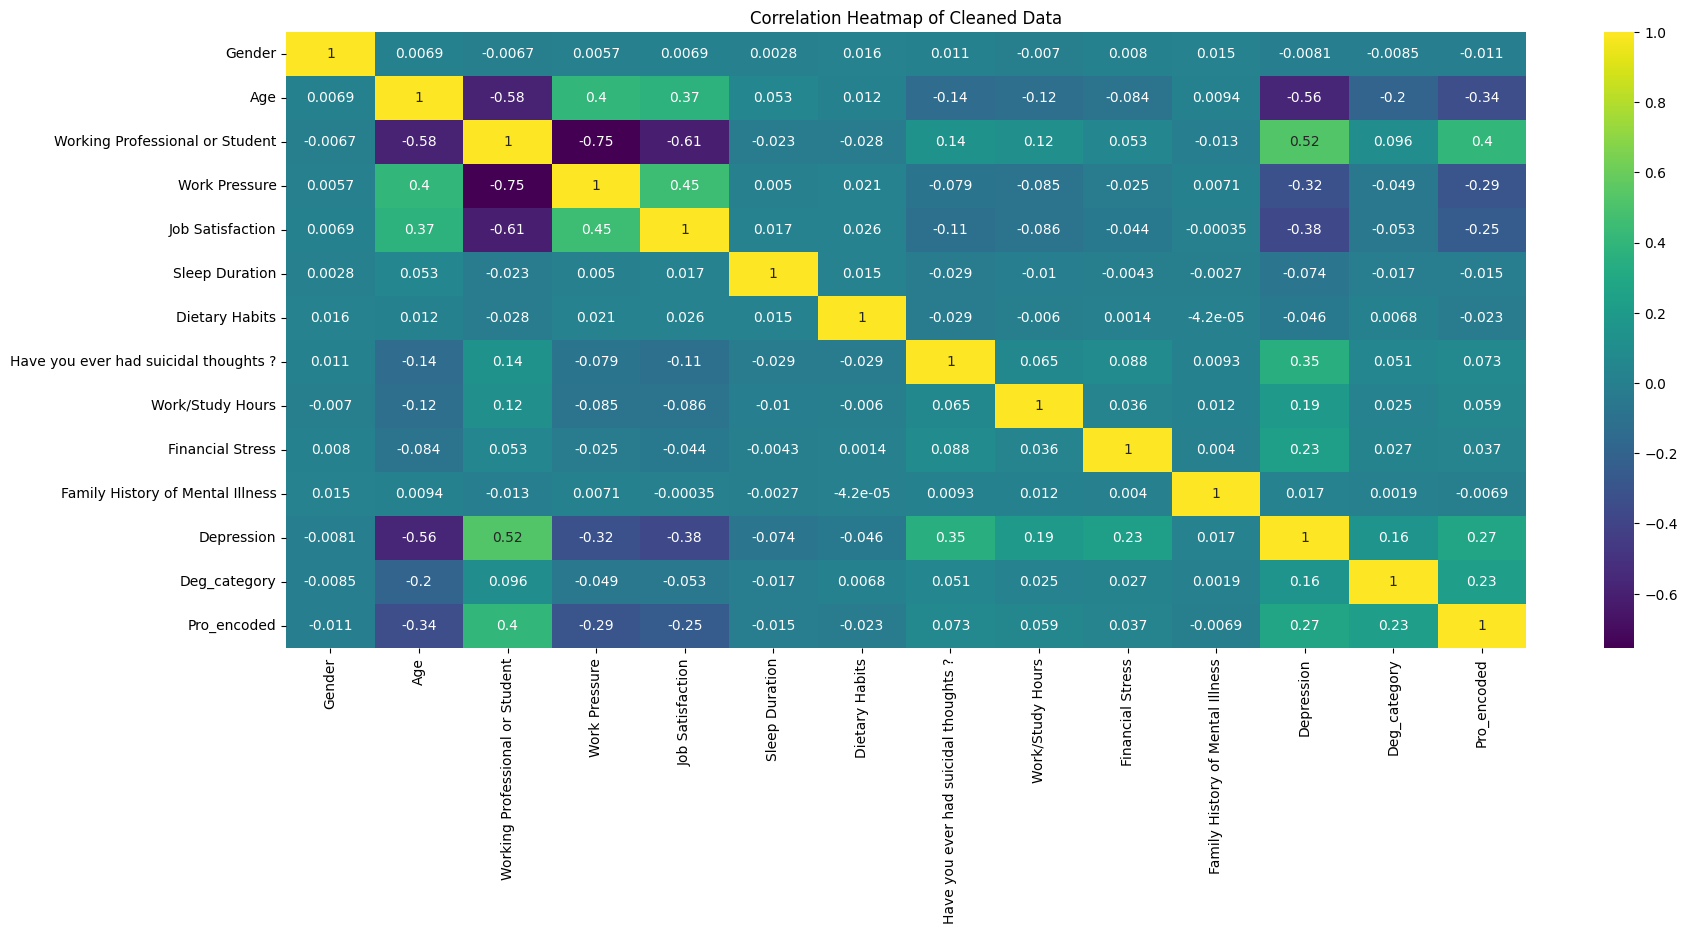

In [72]:
corr = train_df.corr()

plt.figure(figsize=(20, 8))
sns.heatmap(corr, annot=True, cmap='viridis')
plt.title('Correlation Heatmap of Cleaned Data')
plt.show()

In [73]:
corr_resp = corr['Depression'].sort_values(ascending=False)
print(corr_resp)

Depression                               1.000000
Working Professional or Student          0.520790
Have you ever had suicidal thoughts ?    0.349066
Pro_encoded                              0.274744
Financial Stress                         0.227232
Work/Study Hours                         0.191746
Deg_category                             0.156341
Family History of Mental Illness         0.016502
Gender                                  -0.008144
Dietary Habits                          -0.046147
Sleep Duration                          -0.074025
Work Pressure                           -0.318149
Job Satisfaction                        -0.376572
Age                                     -0.564671
Name: Depression, dtype: float64


In [74]:
labels = train_df['Depression']
df = train_df.drop('Depression', axis=1)

train_x, test_x, train_y, test_y = train_test_split(df, labels, test_size = 0.25)

In [75]:
test_y_pred = pd.Series(index=test_df.index)
test_x_pred = test_df

In [76]:
print ("Train_x Shape: ",train_x.shape)
print ("Train_y Shape: ", train_y.shape)
print ("Test_x Shape: ", test_x.shape)
print ("Test_y Shape: ", test_y.shape)

Train_x Shape:  (105525, 13)
Train_y Shape:  (105525,)
Test_x Shape:  (35175, 13)
Test_y Shape:  (35175,)


In [77]:
LR = LogisticRegression(random_state=42, solver='lbfgs', multi_class='multinomial').fit(train_x,train_y)

lr_pred = LR.predict(test_x)

print("LR")
print(confusion_matrix(test_y, lr_pred))
print("Accuracy:",metrics.accuracy_score(test_y, lr_pred))
print ("AUC Score:", roc_auc_score(test_y, lr_pred))
print ("Precision:", precision_score(test_y, lr_pred))
print ("Recall:", recall_score(test_y, lr_pred))
print ("F1 Score:", f1_score(test_y, lr_pred))

LR
[[27520  1281]
 [ 1389  4985]]
Accuracy: 0.9240938166311301
AUC Score: 0.8688029208840073
Precision: 0.7955633578040217
Recall: 0.7820834640727957
F1 Score: 0.7887658227848101


In [78]:
rfc = RandomForestClassifier(n_estimators=100, bootstrap=True, random_state=42)
rfc.fit(train_x, train_y)

rf_pred = rfc.predict(test_x)

print("RandomForest")
print(confusion_matrix(test_y, rf_pred))
print("Accuracy:",metrics.accuracy_score(test_y, rf_pred))
print ("AUC Score:", roc_auc_score(test_y, rf_pred))
print ("Precision:", precision_score(test_y, rf_pred))
print ("Recall:", recall_score(test_y, rf_pred))
print ("F1 Score:", f1_score(test_y, rf_pred))

rf_feat_imp = pd.DataFrame(rfc.feature_importances_,
                                    index = train_x.columns,
                                     columns=['importance']).sort_values('importance', ascending=False)

print(rf_feat_imp)

RandomForest
[[27556  1245]
 [ 1510  4864]]
Accuracy: 0.9216773276474769
AUC Score: 0.8599362142131806
Precision: 0.7962023244393518
Recall: 0.763100094132413
F1 Score: 0.7792998477929985
                                       importance
Age                                      0.278880
Have you ever had suicidal thoughts ?    0.123700
Work/Study Hours                         0.093338
Job Satisfaction                         0.084380
Work Pressure                            0.073887
Financial Stress                         0.073534
Working Professional or Student          0.070117
Pro_encoded                              0.055250
Sleep Duration                           0.041898
Deg_category                             0.035350
Dietary Habits                           0.032917
Gender                                   0.018728
Family History of Mental Illness         0.018019


In [79]:
forest_random_search = {
    'max_depth': [5, 10, 15],
    'max_features': [None, 'sqrt'],
    'min_samples_leaf': [2, 4],
    'min_samples_split': [2, 5],
    'n_estimators': [5, 8, 10],
    'bootstrap': [True] 
}

forest_clf = RandomForestClassifier()

forest_model_random = RandomizedSearchCV(
    estimator=forest_clf,
    param_distributions=forest_random_search,
    n_iter=20,
    cv=KFold(n_splits=5, shuffle=True, random_state=101),
    verbose=5,
    random_state=101,
    n_jobs=-1
)

forest_model_random.fit(train_x, train_y)
rf_pred_1 = forest_model_random.best_estimator_.predict(test_x)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [80]:
print("RandomForest")
print(confusion_matrix(test_y, rf_pred_1))
print("Accuracy:",metrics.accuracy_score(test_y, rf_pred_1))
print ("AUC Score:", roc_auc_score(test_y, rf_pred_1))
print ("Precision:", precision_score(test_y, rf_pred_1))
print ("Recall:", recall_score(test_y, rf_pred_1))
print ("F1 Score:", f1_score(test_y, rf_pred_1))

RandomForest
[[27469  1332]
 [ 1325  5049]]
Accuracy: 0.9244633972992182
AUC Score: 0.8729379303160418
Precision: 0.7912552891396333
Recall: 0.7921242547850643
F1 Score: 0.791689533516268


In [81]:
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb = gb.fit(train_x,train_y)

gb_pred = gb.predict(test_x)


print("Graboosting")
print(confusion_matrix(test_y, gb_pred))
print("Accuracy:",metrics.accuracy_score(test_y, gb_pred))
print ("AUC Score:", roc_auc_score(test_y, gb_pred))
print ("Precision:", precision_score(test_y, gb_pred))
print ("Recall:", recall_score(test_y, gb_pred))
print ("F1 Score:", f1_score(test_y, gb_pred))

Graboosting
[[27604  1197]
 [ 1304  5070]]
Accuracy: 0.9288983653162758
AUC Score: 0.8769289161648905
Precision: 0.8089995213020584
Recall: 0.7954188892375275
F1 Score: 0.802151728502492


In [82]:
grad_random_search = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 10],
    'max_features': ['log2','sqrt'], 
    'min_samples_leaf': [2, 4],
    'min_samples_split': [2, 5], 
    'n_estimators': [20,50,100], 
    'subsample': [0.8, 1.0]
}

grad_clf = GradientBoostingClassifier()
grad_model_random = RandomizedSearchCV(estimator=grad_clf, 
                                       param_distributions=grad_random_search, 
                                       n_iter=20, 
                                       cv=KFold(n_splits=5),
                                       verbose=5, 
                                       random_state=101, 
                                       n_jobs=-1)

grad_model_random.fit(train_x, train_y)

print("Best parameters found:", grad_model_random.best_params_)
gb_pred_1 = grad_model_random.best_estimator_.predict(test_x)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 3/5] END bootstrap=True, max_depth=5, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=5;, score=0.918 total time=   1.1s
[CV 3/5] END bootstrap=True, max_depth=15, max_features=None, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.921 total time=   3.5s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=5;, score=0.922 total time=   0.5s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=5;, score=0.924 total time=   0.5s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=10;, score=0.926 total time=   2.5s
[CV 2/5] END bootstrap=True, max_depth=15, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=8;, score=0.921 total time=   2.3s
[CV 1/5] END bootstrap=True, ma

In [83]:
gb_pred_1

array([0, 1, 1, ..., 0, 0, 0])

In [84]:
print("Graboosting")
print(confusion_matrix(test_y, gb_pred_1))
print("Accuracy:",metrics.accuracy_score(test_y, gb_pred_1))
print ("AUC Score:", roc_auc_score(test_y, gb_pred_1))
print ("Precision:", precision_score(test_y, gb_pred_1))
print ("Recall:", recall_score(test_y, gb_pred_1))
print ("F1 Score:", f1_score(test_y, gb_pred_1))

Graboosting
[[27604  1197]
 [ 1281  5093]]
Accuracy: 0.9295522388059702
AUC Score: 0.8787331207460014
Precision: 0.809697933227345
Recall: 0.799027298399749
F1 Score: 0.8043272267845862


In [85]:
final = grad_model_random.best_estimator_.predict(test_df)

In [86]:
depression_submit = pd.DataFrame({'id': test_df_copy['id'],'Depression': final})
depression_submit.to_csv('submission.csv',index=False)

In [87]:
depression_submit.head(5)

,id,Depression
0,140700,0
1,140701,0
2,140702,0
3,140703,1
4,140704,0
